<a href="https://colab.research.google.com/github/HanifAjiPrasetyo/PCVK/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


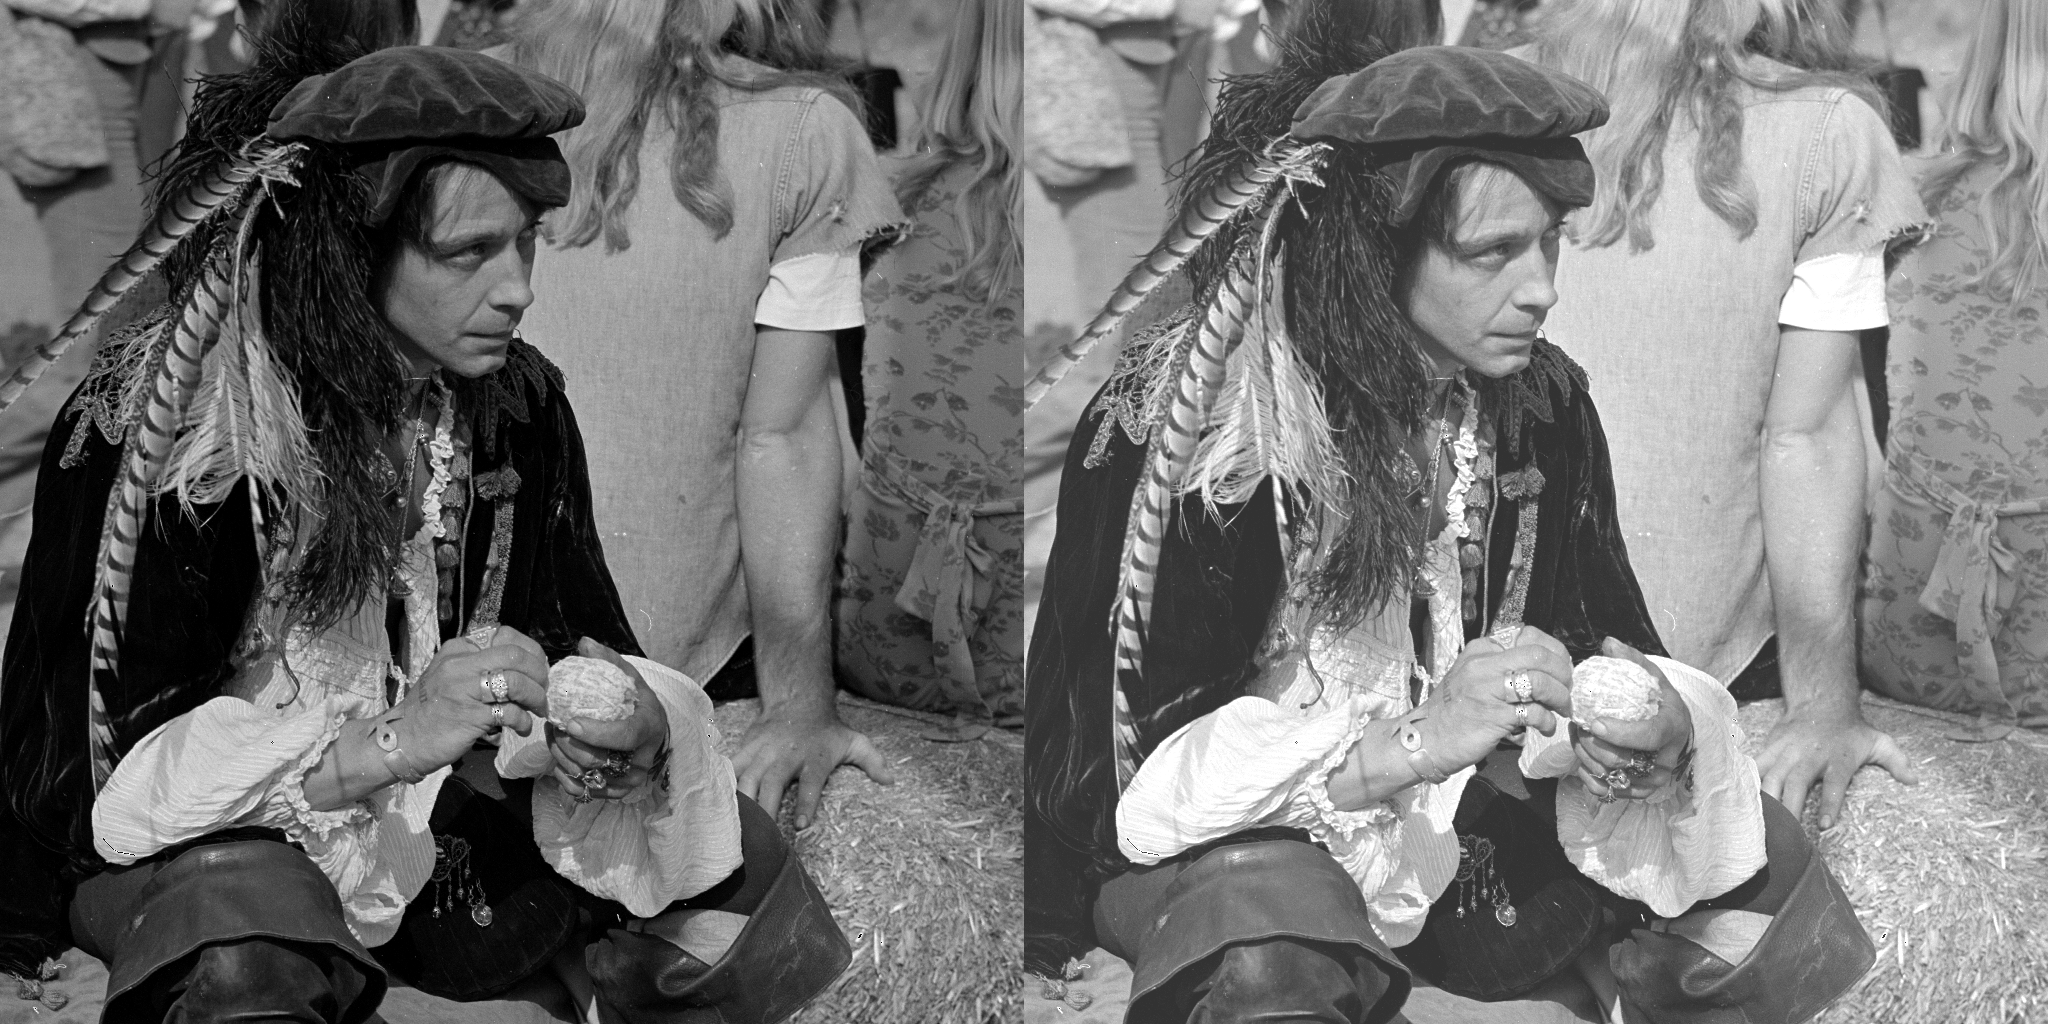

In [11]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/male.tiff')
brightness_img = np.zeros(original.shape,original.dtype)

# akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_img[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_img))
cv2_imshow(final_frame)

TUGAS PRAKTIKUM

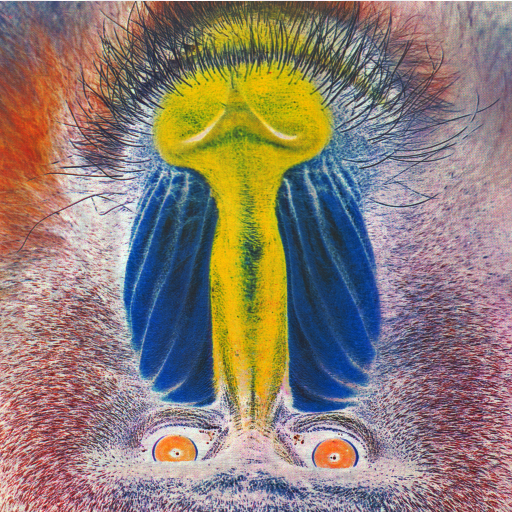

In [15]:
# 1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori


# Baca citra
image = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/mandrill2.tiff')

# Lakukan inversi citra (mengurangkan nilai piksel dari 255)
inverted_image = 255 - image

# Simpan citra hasil inversi
cv.imwrite('output.jpg', inverted_image)

# Tampilkan citra hasil inversi (optional)
cv2_imshow(inverted_image)


Mengubah kontras dan tingkat kecerahan citra
--------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


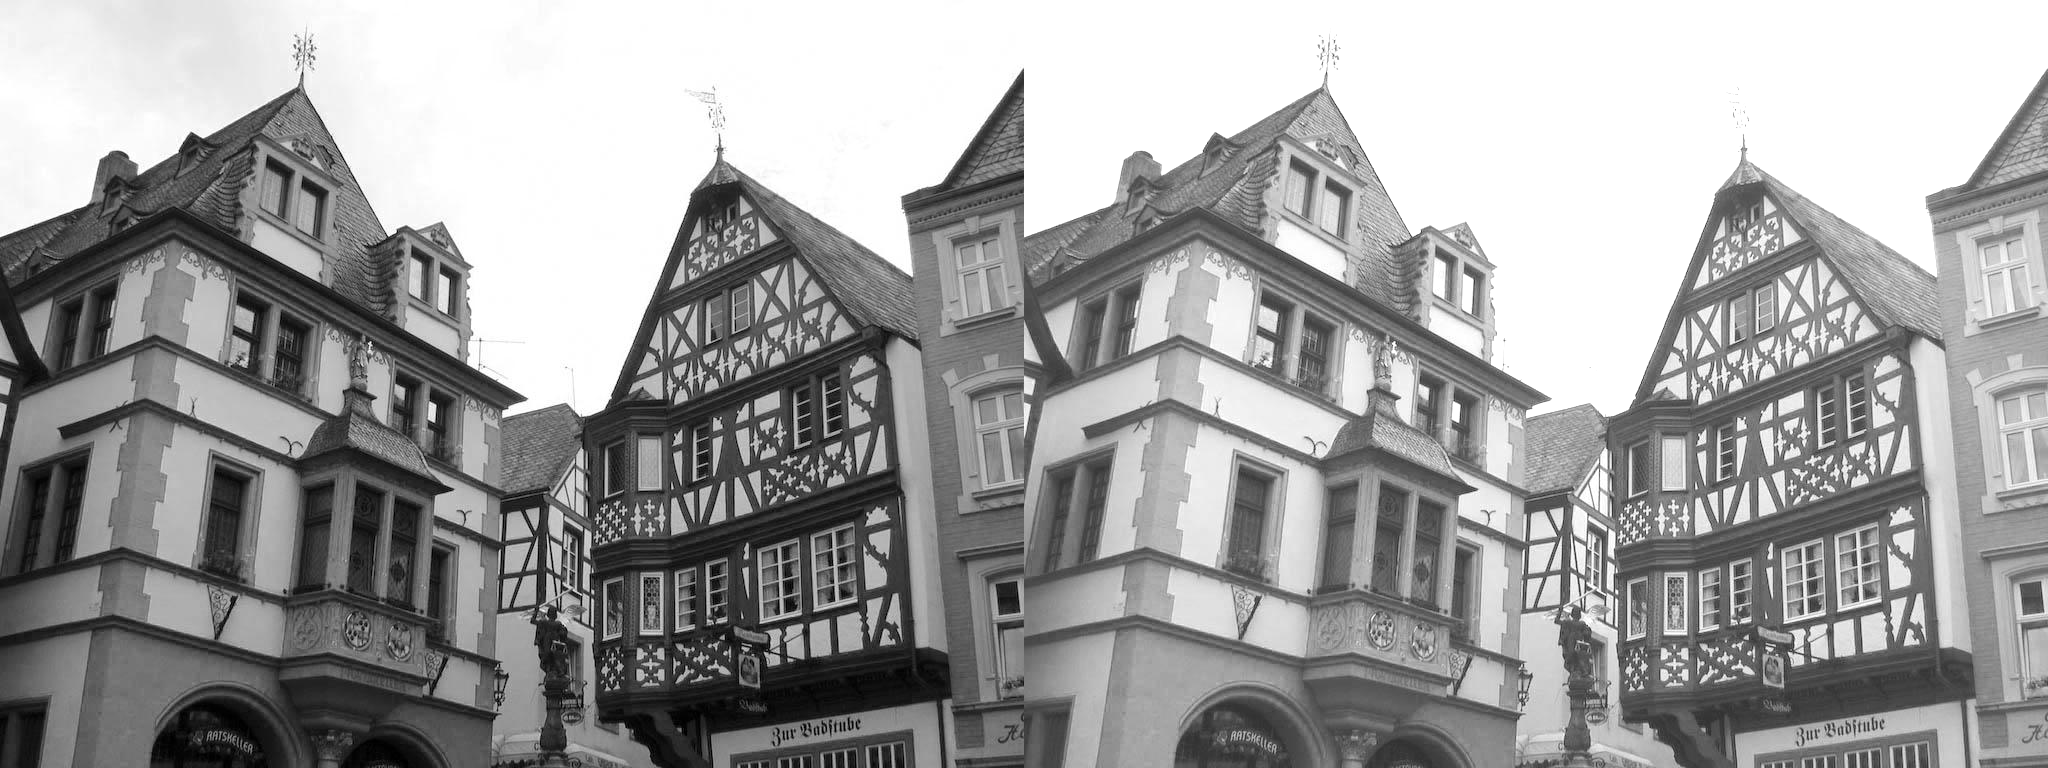

In [17]:
# 2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk kontras

# Baca citra
img = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/old_house.jpg')

print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
except ValueError:
  print('Error, not a number')

try:
  contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a double number')

# Hitung faktor berdasarkan rumus
factor = (259 * (contrast + 255)) / (255 * (259 - contrast))

# Lakukan transformasi kontras pada setiap piksel
processed_img = img.copy()
for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        pixel = img[y, x]
        red_baru = np.clip(factor * (pixel[2] - 128) + 128, 0, 255)
        green_baru = np.clip(factor * (pixel[1] - 128) + 128, 0, 255)
        blue_baru = np.clip(factor * (pixel[0] - 128) + 128, 0, 255)
        processed_img[y, x] = (blue_baru, green_baru, red_baru)

# akses per piksel
for y in range(processed_img.shape[0]):
  for x in range(processed_img.shape[1]):
    for c in range(processed_img.shape[2]):
      processed_img[y,x,c] = np.clip(img[y,x,c] + brightness, 0, 255)

# Tampilkan citra hasil transformasi kontras
final_frame = cv.hconcat((img, processed_img))
cv2_imshow(final_frame)

In [20]:
# 3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log
import math

print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

# Baca citra
image2 = img.copy()  # Ganti 'nama_berkas.jpg' dengan nama berkas Anda

# Menghitung konstanta c dalam rumus transformasi logaritma
c = 255 / math.log(256)  # 256 adalah jumlah tingkat abu-abu dalam citra 8-bit

# Menerapkan transformasi logaritma untuk meningkatkan kecerahan
brightened_image = c * (np.log1p(image2) / math.log(256)) * (brightness/10)

# Pastikan nilai piksel tetap dalam rentang 0-255
brightened_image = np.clip(brightened_image, 0, 255)

# Konversi citra hasil transformasi ke tipe data uint8
brightened_image = np.uint8(brightened_image)

# Tampilkan citra asli dan hasil transformasi kecerahan
final_frame = cv.hconcat((img, brightened_image))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukkan nilai kecerahan: 50


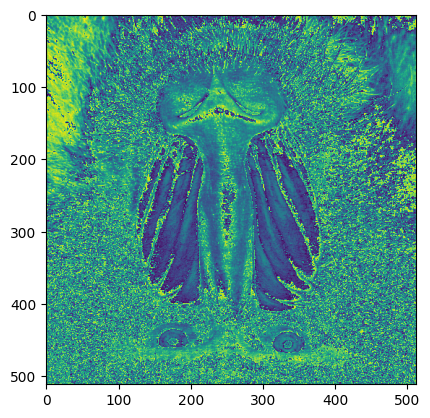

In [57]:
# 4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance

img3 = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/mandrill2.tiff')
cv.cvtColor(img3, cv.COLOR_BGR2GRAY)

# Metode Averaging (Rata-rata)
avg = img3.copy()
averaging_image = np.mean(avg, axis=2, dtype=np.uint8)

# Metode Lightness (Nilai Tengah)
light = img3.copy()
lightness_image = ((np.max(light, axis=2) + np.min(light, axis=2)) / 2).astype(np.uint8)

# Metode Luminance (Rumus Luminance Y = 0.21*R + 0.72*G + 0.07*B)
lumi = img3.copy()
luminance_image = (0.21 * lumi[:, :, 2] + 0.72 * lumi[:, :, 1] + 0.07 * lumi[:, :, 0]).astype(np.uint8)

# Tampilkan citra hasil transformasi ke grayscale
plt.imshow(averaging_image)

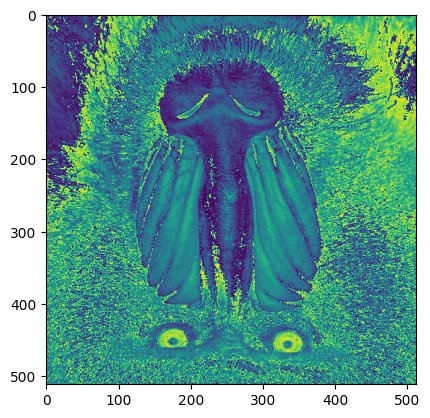

In [58]:
plt.imshow(lightness_image)

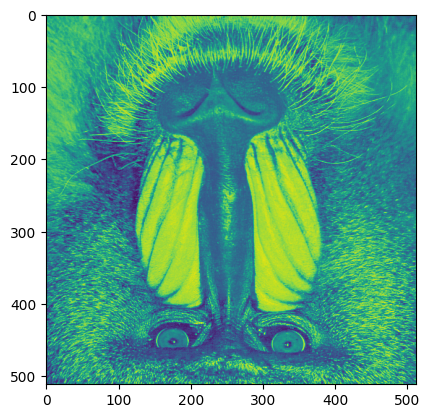

In [59]:
plt.imshow(luminance_image)

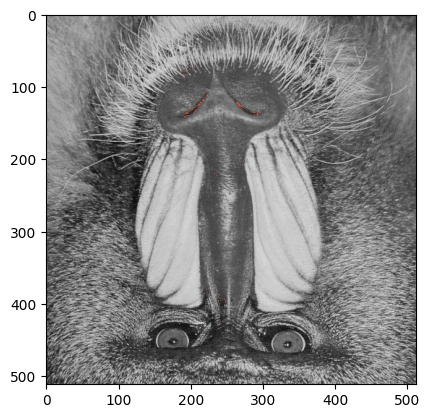

In [55]:
# Baca citra
img4 = img3.copy()

# Tentukan batasan warna (contoh: warna biru dalam format BGR)
lower_blue = np.array([100, 0, 0], dtype=np.uint8)
upper_blue = np.array([255, 50, 50], dtype=np.uint8)

# Buat mask untuk citra berdasarkan batasan warna biru
blue_mask = cv.inRange(img4, lower_blue, upper_blue)

# Ubah bagian citra yang tidak berwarna biru menjadi grayscale
gray_image = cv.cvtColor(img4, cv.COLOR_BGR2GRAY)
gray_image = cv.cvtColor(gray_image, cv.COLOR_GRAY2BGR)

# Gabungkan citra biru dengan citra grayscale
result_image = cv.bitwise_and(img4, img4, mask=blue_mask)
result_image = cv.add(result_image, gray_image)

# Tampilkan citra hasil
plt.imshow(result_image)